In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, matthews_corrcoef
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

# Data Analysis

In [78]:
df =  pd.read_csv('./HR_Analytics.csv.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Our dataset has 1470 observations and 35 variables with categorical and numerical values. We aim to answer questions that will help optimize workforce planning, improve the hiring process, and gain a better understanding of our employees.

In [79]:
print(df.shape)

(1470, 35)


In [80]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Which departments have the highest turnover rates?

In [81]:
df['Attrition'] = np.where(df['Attrition'] == 'Yes', 1, 0)
df_dept = df.groupby('Department')['Attrition'].mean().reset_index()
df_dept

,Department,Attrition
0,Human Resources,0.190476
1,Research & Development,0.138398
2,Sales,0.206278


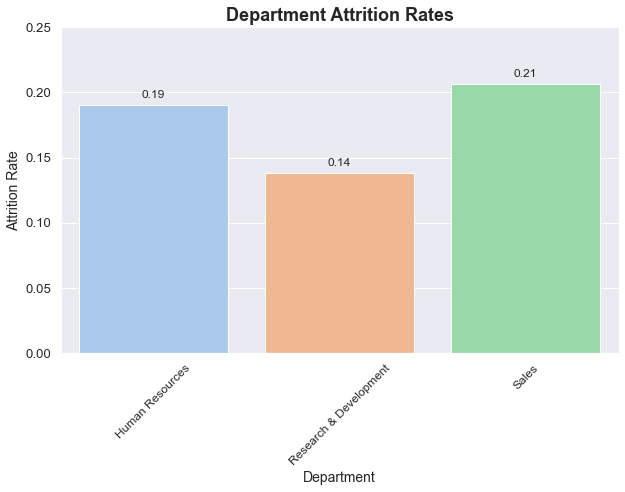

In [82]:
# Set style
sns.set_style('darkgrid')
sns.set_palette('pastel')

# Create bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Department', y='Attrition', data=df_dept)

# Set chart properties
plt.title('Department Attrition Rates', fontsize=18, fontweight='bold')
plt.xlabel('Department', fontsize=14)
plt.ylabel('Attrition Rate', fontsize=14)
plt.ylim((0, 0.25))
plt.xticks(rotation=45, fontsize=12)

# Add text labels to bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points', fontsize=12)

plt.show()

Sales department has the highest turnover and further investigation should be conducted to reduce it.

## Which departments do employees with high salaries usually work in?

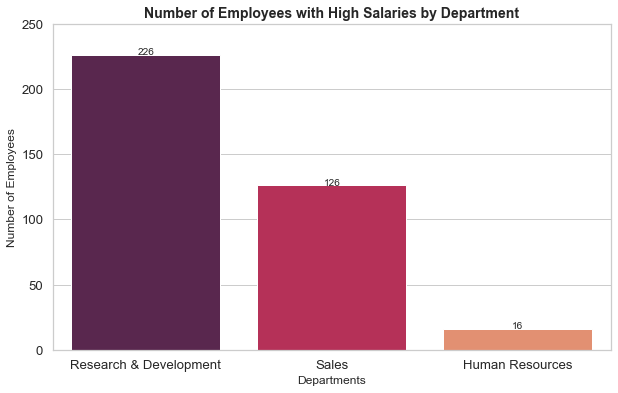

In [83]:
high_income = df[df['MonthlyIncome'] > df['MonthlyIncome'].quantile(0.75)]
department_counts = high_income['Department'].value_counts()

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.barplot(x=department_counts.index, y=department_counts.values, palette="rocket")
plt.title('Number of Employees with High Salaries by Department', fontsize=14, fontweight='bold')
plt.xlabel('Departments', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.ylim((0, 250))
for i, rate in enumerate(department_counts):
    plt.text(i, rate+0.02, f'{rate:.0f}', ha='center', fontsize=10)
plt.show()

The graph shows that Research & Development department employees receive higher salaries.

## Which education level do employees with higher salaries have?

In [84]:
ed_level = df.groupby('Education')['MonthlyIncome'].mean().reset_index()
ed_level

,Education,MonthlyIncome
0,1,5640.570588
1,2,6226.645390
2,3,6517.263986
3,4,6832.402010
4,5,8277.645833


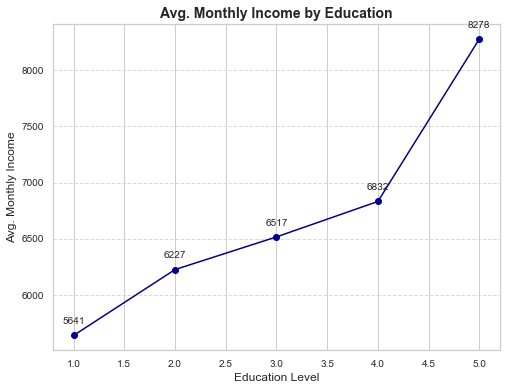

In [85]:
plt.figure(figsize=(8, 6))
plt.plot(ed_level['Education'], ed_level['MonthlyIncome'], color='darkblue', marker='o')
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Avg. Monthly Income', fontsize=12)
plt.title('Avg. Monthly Income by Education', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
for x, y in zip(ed_level['Education'], ed_level['MonthlyIncome']):
    plt.text(x, y+100, f'{y:.0f}', ha='center', fontsize=10)
plt.show()

Employees with higher education levels tend to receive higher salaries as the graph shows an increasing trend in average monthly income with an increase in education level.

## Does gender have an effect on turnover rates?

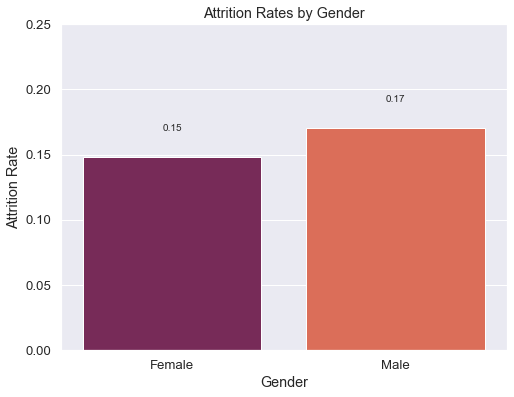

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group Gender and Attrition columns and count the number of occurrences
gender_att = df.groupby(['Gender', 'Attrition'])['Attrition'].count().unstack()

# Calculate Attrition Rate for each group
gender_att['Attrition Rate'] = gender_att[1] / (gender_att[1] + gender_att[0])

# Create a bar plot
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
sns.barplot(x=gender_att.index, y=gender_att['Attrition Rate'], palette="rocket")
plt.title('Attrition Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Attrition Rate')
plt.ylim((0, 0.25))
for i, rate in enumerate(gender_att['Attrition Rate']):
    plt.text(i, rate+0.02, f'{rate:.2f}', ha='center')

plt.show()

Women employees have a leaving rate of 0.15, while men have a leaving rate of 0.17, indicating that gender does not have a significant impact on job leaving.

## Is there a relationship between job satisfaction and turnover rates?

Statistical tests are needed to answer this question accurately, rather than relying only on a graph.

In [87]:
sa_att = df.groupby(['JobSatisfaction', 'Attrition'])['Attrition'].count().unstack()

# Attrition rates are calculated for each group
sa_att['Attrition Rate'] = sa_att[1] / (sa_att[1] + sa_att[0])
sa_att

Attrition,0,1,Attrition Rate
JobSatisfaction,,,
1,223,66,0.228374
2,234,46,0.164286
3,369,73,0.165158
4,407,52,0.113290


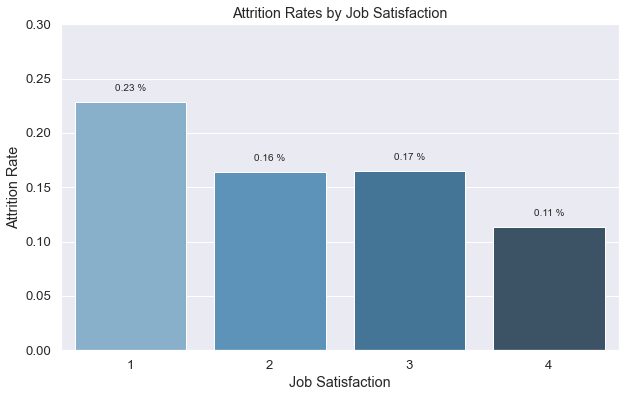

In [88]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
plot = sns.barplot(x=sa_att.index, y=sa_att['Attrition Rate'], palette="Blues_d")
plt.title('Attrition Rates by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Attrition Rate')
plt.ylim((0, 0.3))
for i, rate in enumerate(sa_att['Attrition Rate']):
    plot.text(i, rate+0.01, f'{rate:.2f} %', ha='center')
plt.show()

### Correlation Test

In [89]:
correlation = df["JobSatisfaction"].corr(df["Attrition"])
print("Correlation: ", correlation)

Correlation:  -0.10348112606902127


The correlation of 0.1 suggests a linear relationship, but it is not sufficient to draw conclusions solely based on this. 
To investigate binary relationships between categorical variables and use the chi-square test for more conclusive results.

### Chi-square Test

In [90]:
contingency_table = pd.crosstab(df["Gender"], df["Attrition"])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistics: ", chi2)
print("p-value: ", p_value)

Chi-square statistics:  1.1169671241970975
p-value:  0.29057244902890855


The p-value from the chi-square test represents the probability of the hypothesis being true. If it's lower than the acceptable level, the hypothesis is rejected. A p-value of 0.29 suggests no significant relationship between the variables since it's above the acceptable level.

### T-Test

In [91]:
satisfied = df[df["JobSatisfaction"] >= 3]
not_satisfied = df[df["JobSatisfaction"] < 3]

t_statistic, p_value = ttest_ind(satisfied["Attrition"], not_satisfied["Attrition"])

print("T-test statistics: ", t_statistic)
print("p-value: ", p_value)

T-test statistics:  -2.957368420952157
p-value:  0.003152374537239955


The p-value of 0.03 shows there is enough evidence to reject the hypothesis, indicating a significant difference between the two groups. This suggests that JobSatisfaction may affect job retention and is useful for building ML models.

# Machine Learning

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int32 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [93]:
df['Satisfied'] = np.where(df["JobSatisfaction"] >= 3, 1, 0)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Satisfied
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,1
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


In [94]:
cat_features = df.select_dtypes('object').copy()
num_features = df.select_dtypes(['float64', 'int64', 'int32']).copy()
cat_features.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [95]:
def plot_numeric_variable_boxplots(dataframe):
    numerical_vars = dataframe.select_dtypes(include=['float64', 'int64', 'int32']).columns
    num_vars = len(numerical_vars)
    rows = (num_vars // 4) + (num_vars % 4)
    
    fig, axs = plt.subplots(rows, 4, figsize=(20, 6*rows))
    axs = axs.flatten()
    
    for i, var in enumerate(numerical_vars):
        sns.boxplot(data=dataframe, x=var, ax=axs[i], color='lightblue', linewidth=2, fliersize=5)
        axs[i].set_title(f"Boxplot of {var}", fontsize=14)
        axs[i].set_xlabel('')
        axs[i].set_ylabel(var, fontsize=12)
        axs[i].tick_params(labelsize=10)
        for spine in axs[i].spines.values():
            spine.set_visible(True)
            spine.set_color('gray')
            spine.set_linewidth(0.5)
    
    for i in range(num_vars, 4*rows):
        fig.delaxes(axs[i])
    
    plt.tight_layout()
    plt.show()

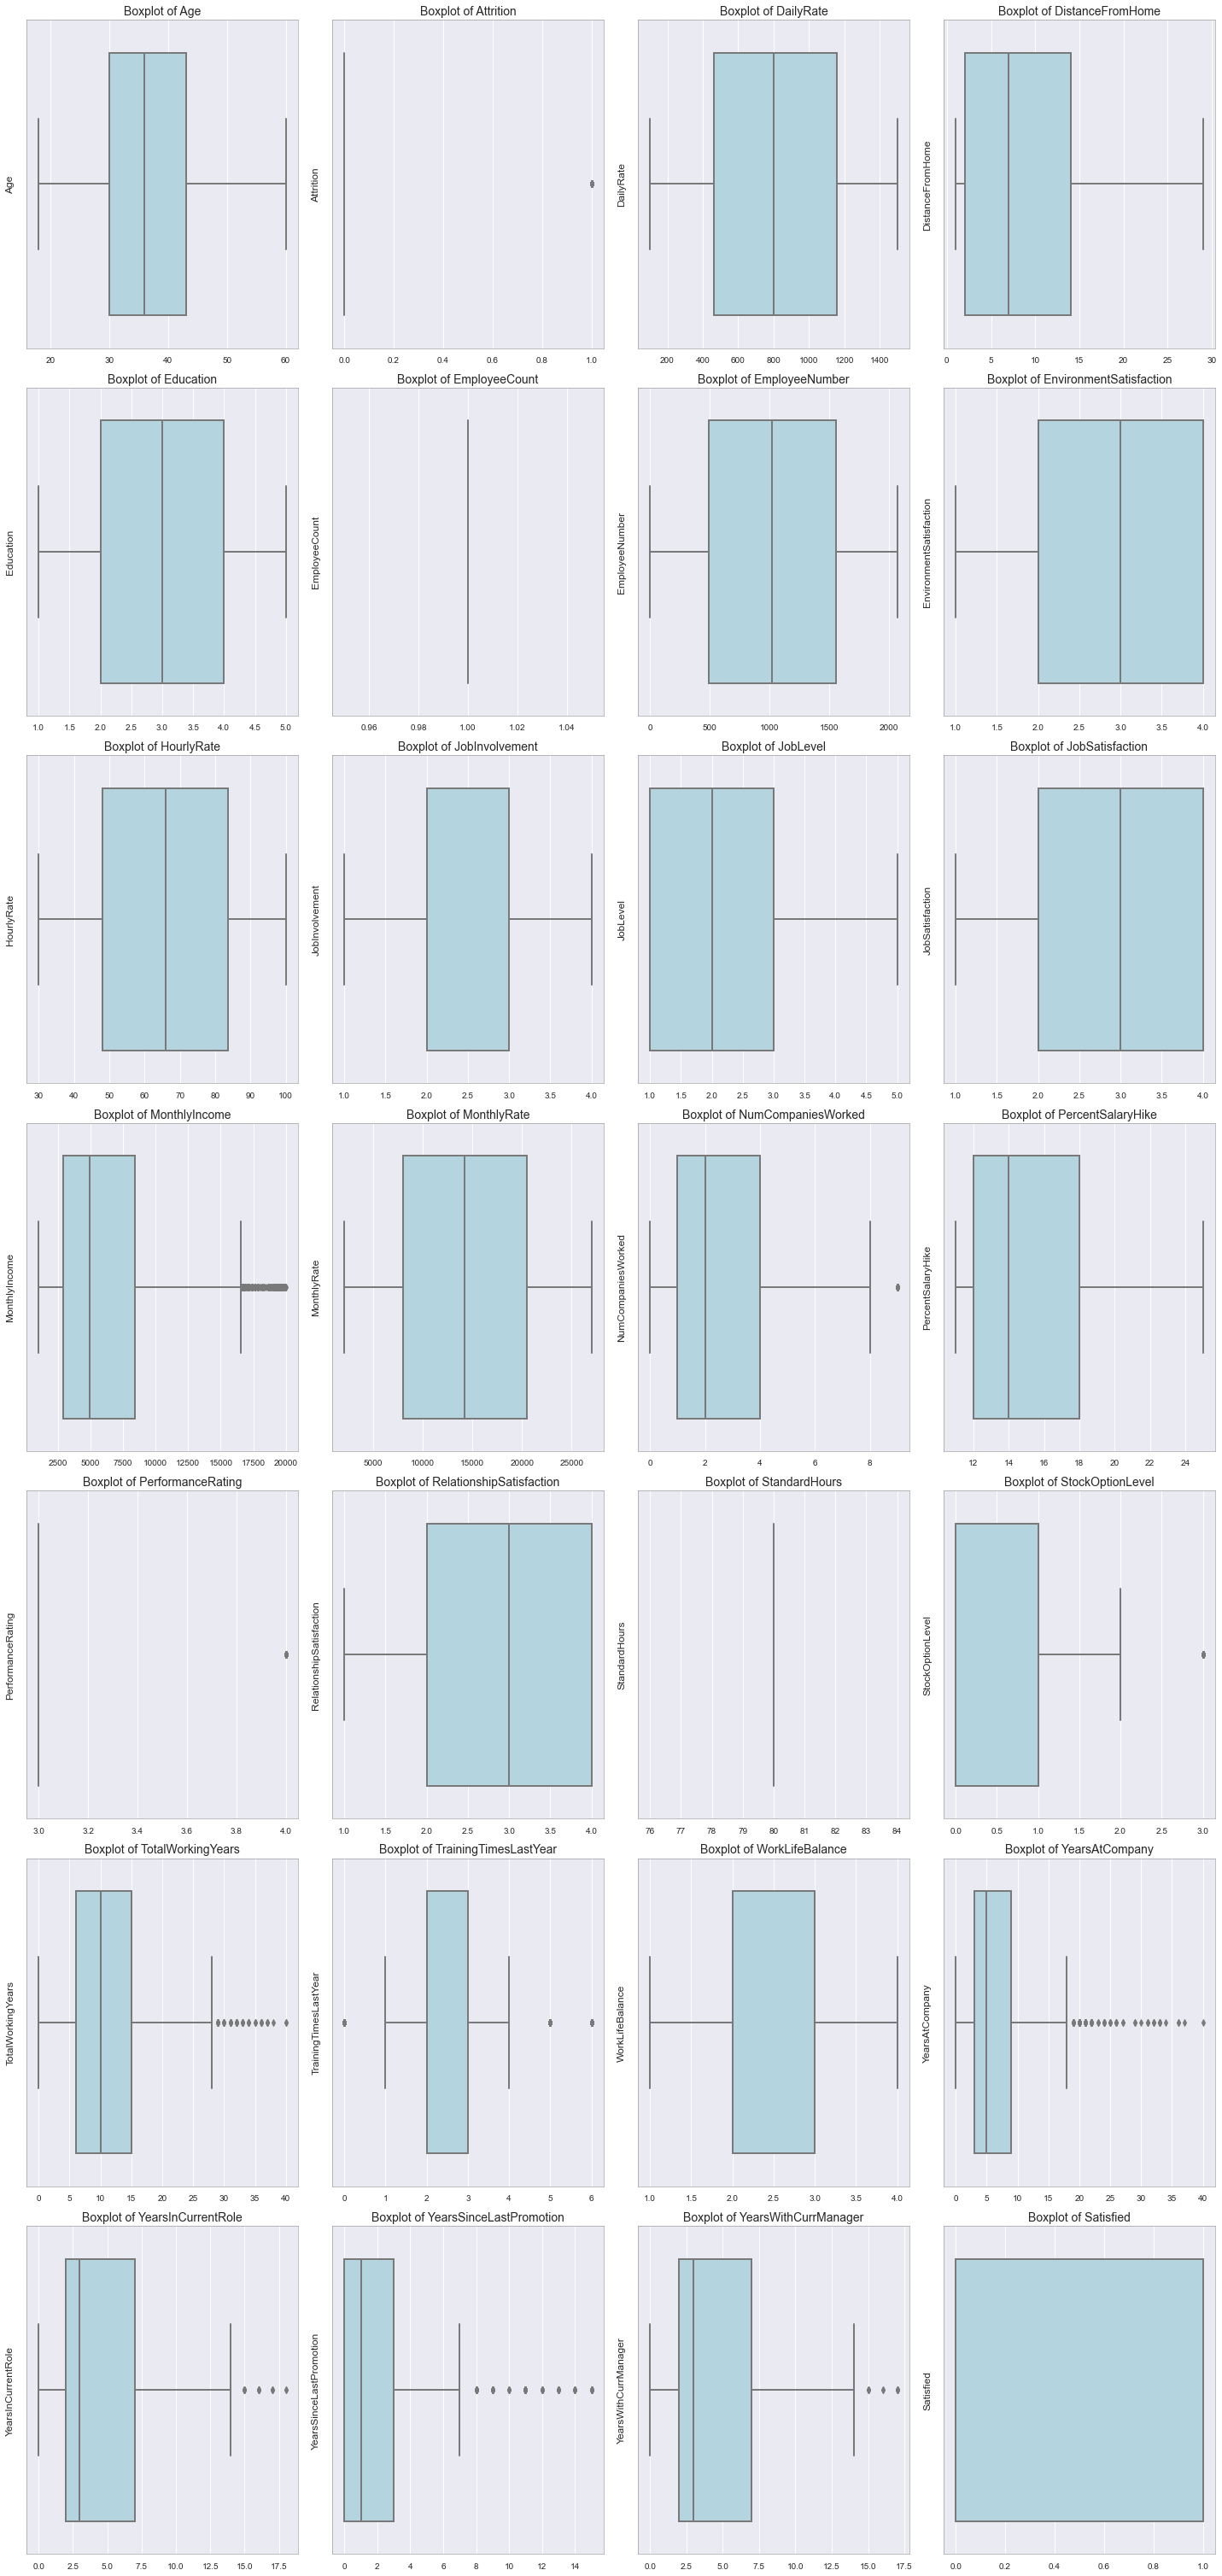

In [96]:
plot_numeric_variable_boxplots(num_features)

In [97]:
num_features.drop(['EmployeeNumber', 'Attrition', 'PerformanceRating', 'Satisfied',
                   'EmployeeCount', 'StandardHours'], axis = 1, inplace = True)

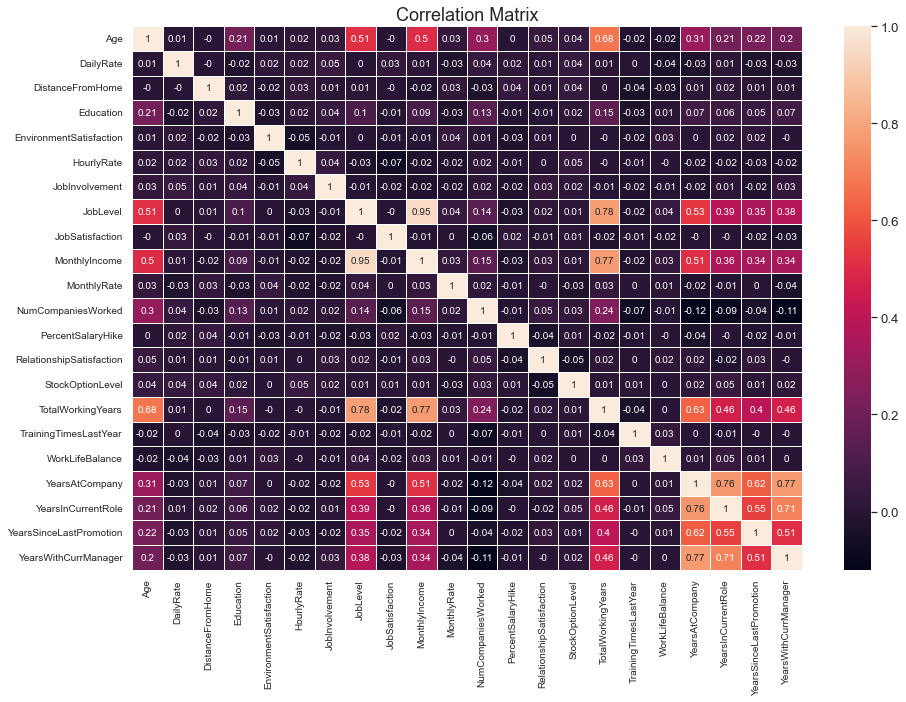

In [98]:
def plot_correlation_map(dataframe):
    numerical_vars = dataframe.select_dtypes(include=['float64', 'int64', 'int32']).columns
    corr = dataframe[numerical_vars].corr().round(2)
    
    plt.figure(figsize=(15, 10))
    sns.heatmap(corr, annot=True, linewidths=0.5)
    plt.title('Correlation Matrix', fontsize=18)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()
    
plot_correlation_map(num_features)

High correlation between some variables, create categorical count graph function.

In [99]:
def plot_categorical_variable_countplot(dataframe):
    cat_vars = dataframe.columns
    num_vars = len(cat_vars)
    rows = (num_vars // 3) + (num_vars % 3)
    
    fig, axs = plt.subplots(rows, 3, figsize=(20, 6*rows))
    axs = axs.flatten()
    
    for i, var in enumerate(cat_vars):
        sns.countplot(data=dataframe, x=var, ax=axs[i])
        axs[i].set_title(f"Countplot of {var}")
    
    for i in range(num_vars, 3*rows):
        fig.delaxes(axs[i])
    
    plt.tight_layout()
    plt.show()

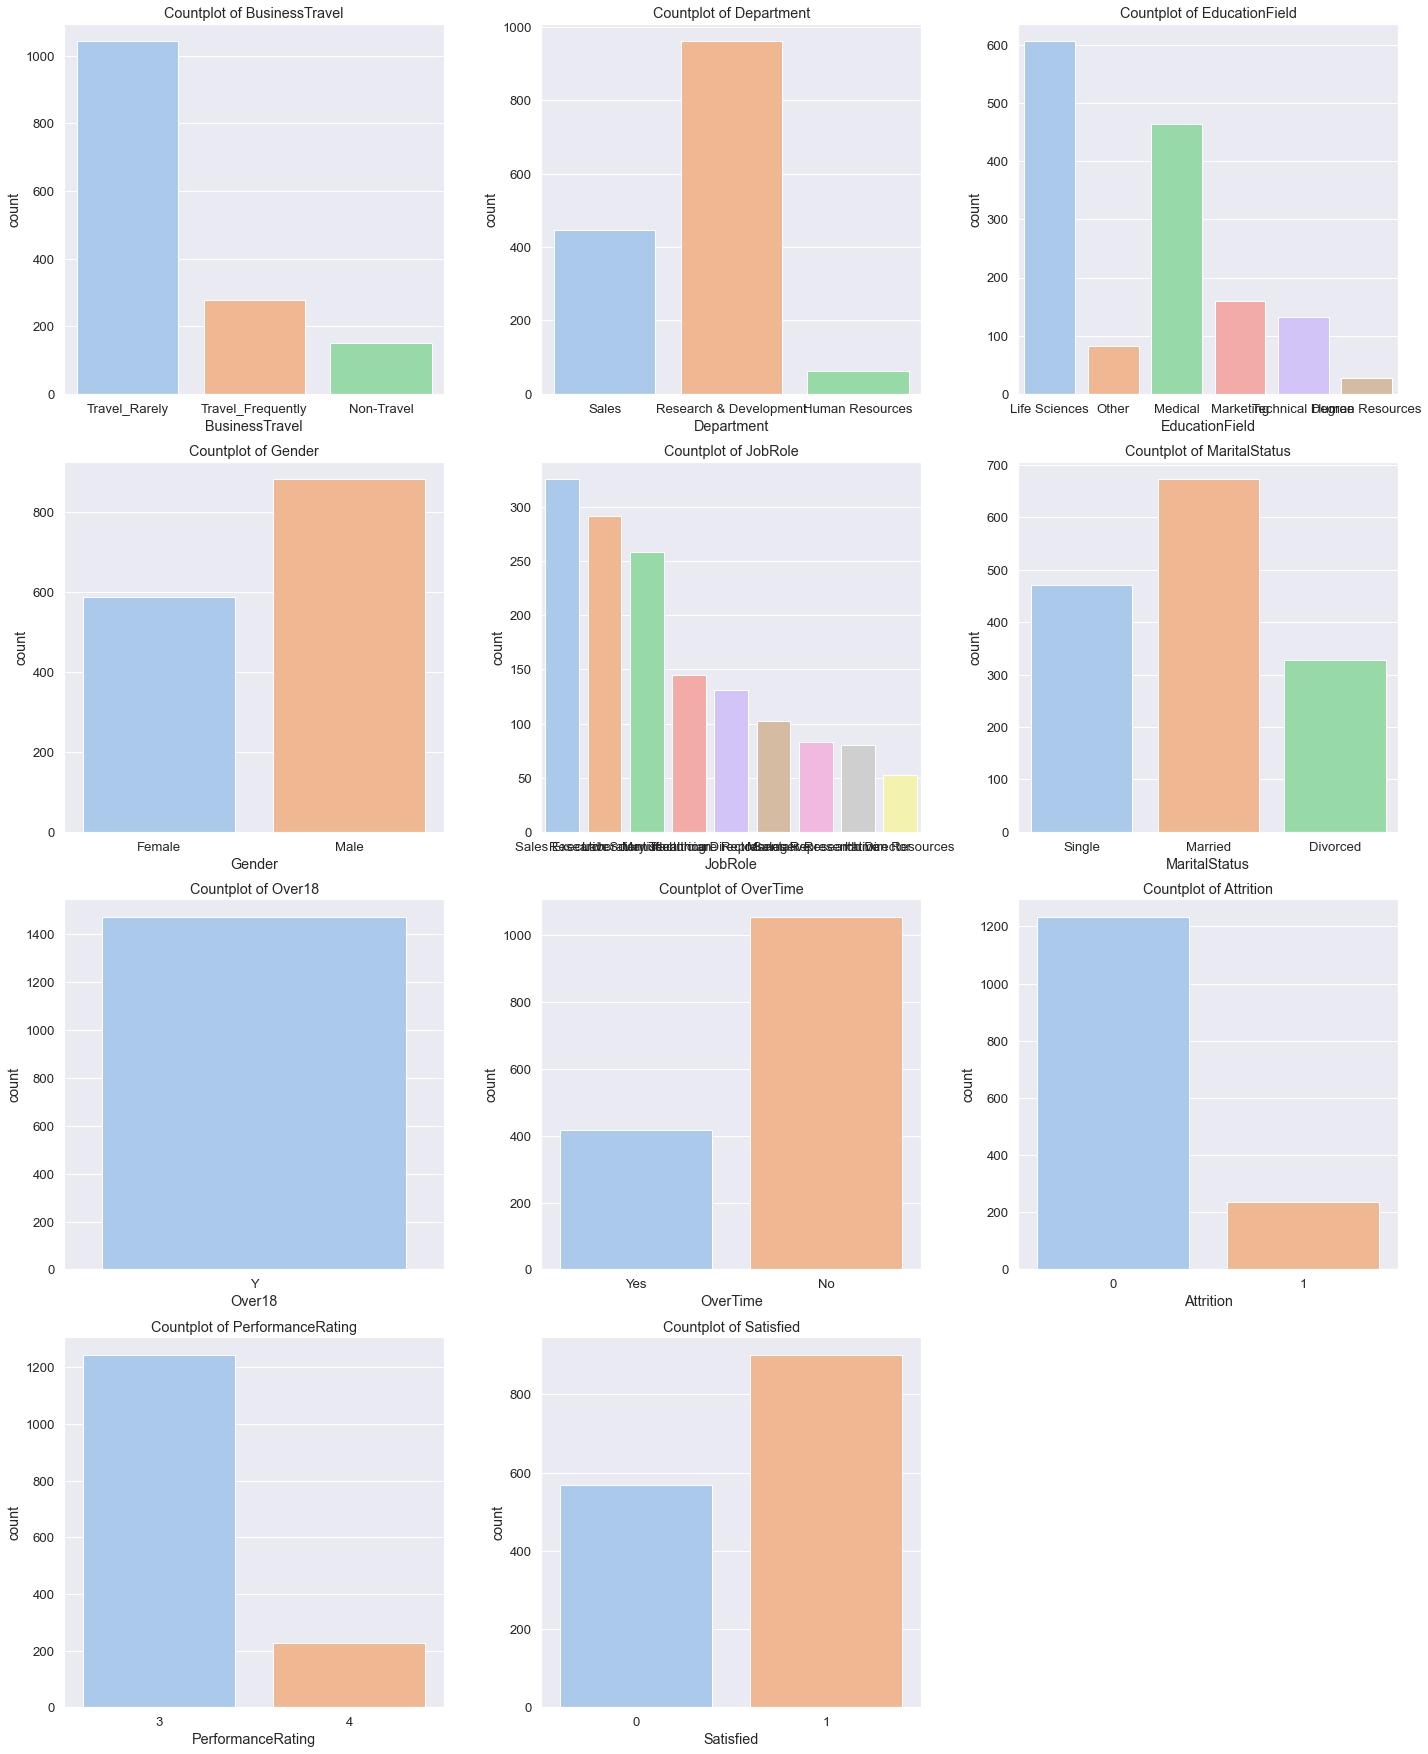

In [100]:
cat_features[['Attrition', 'PerformanceRating', 'Satisfied']] = df[['Attrition', 'PerformanceRating', 'Satisfied']].copy()
plot_categorical_variable_countplot(cat_features)

In [101]:
cat_features.drop('Over18', axis = 1, inplace = True)

In [102]:
num_columns = list(num_features.columns)
cat_columns = list(cat_features.columns)
df[num_columns] = num_features
df[cat_columns] = cat_features
df.drop(['Over18', 'EmployeeNumber', 'EmployeeCount', 'StandardHours'], axis = 1, inplace = True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Satisfied
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,0,8,0,1,6,4,0,5,1
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,1,10,3,3,10,7,1,7,0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,0,7,3,3,0,0,0,0,1
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,0,8,3,3,8,7,3,0,1
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,1,6,3,3,2,2,2,2,0


In [103]:
df_dum = pd.get_dummies(df, drop_first = True)
print(df_dum.shape)
df_dum.head()

(1470, 46)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,0,0,0,0,0,1,0,0,1,1
1,49,0,279,8,1,3,61,2,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,2,4,92,2,1,3,...,1,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,4,56,3,1,3,...,0,0,0,0,1,0,0,1,0,1
4,27,0,591,2,1,1,40,3,1,2,...,1,0,0,0,0,0,0,1,0,0


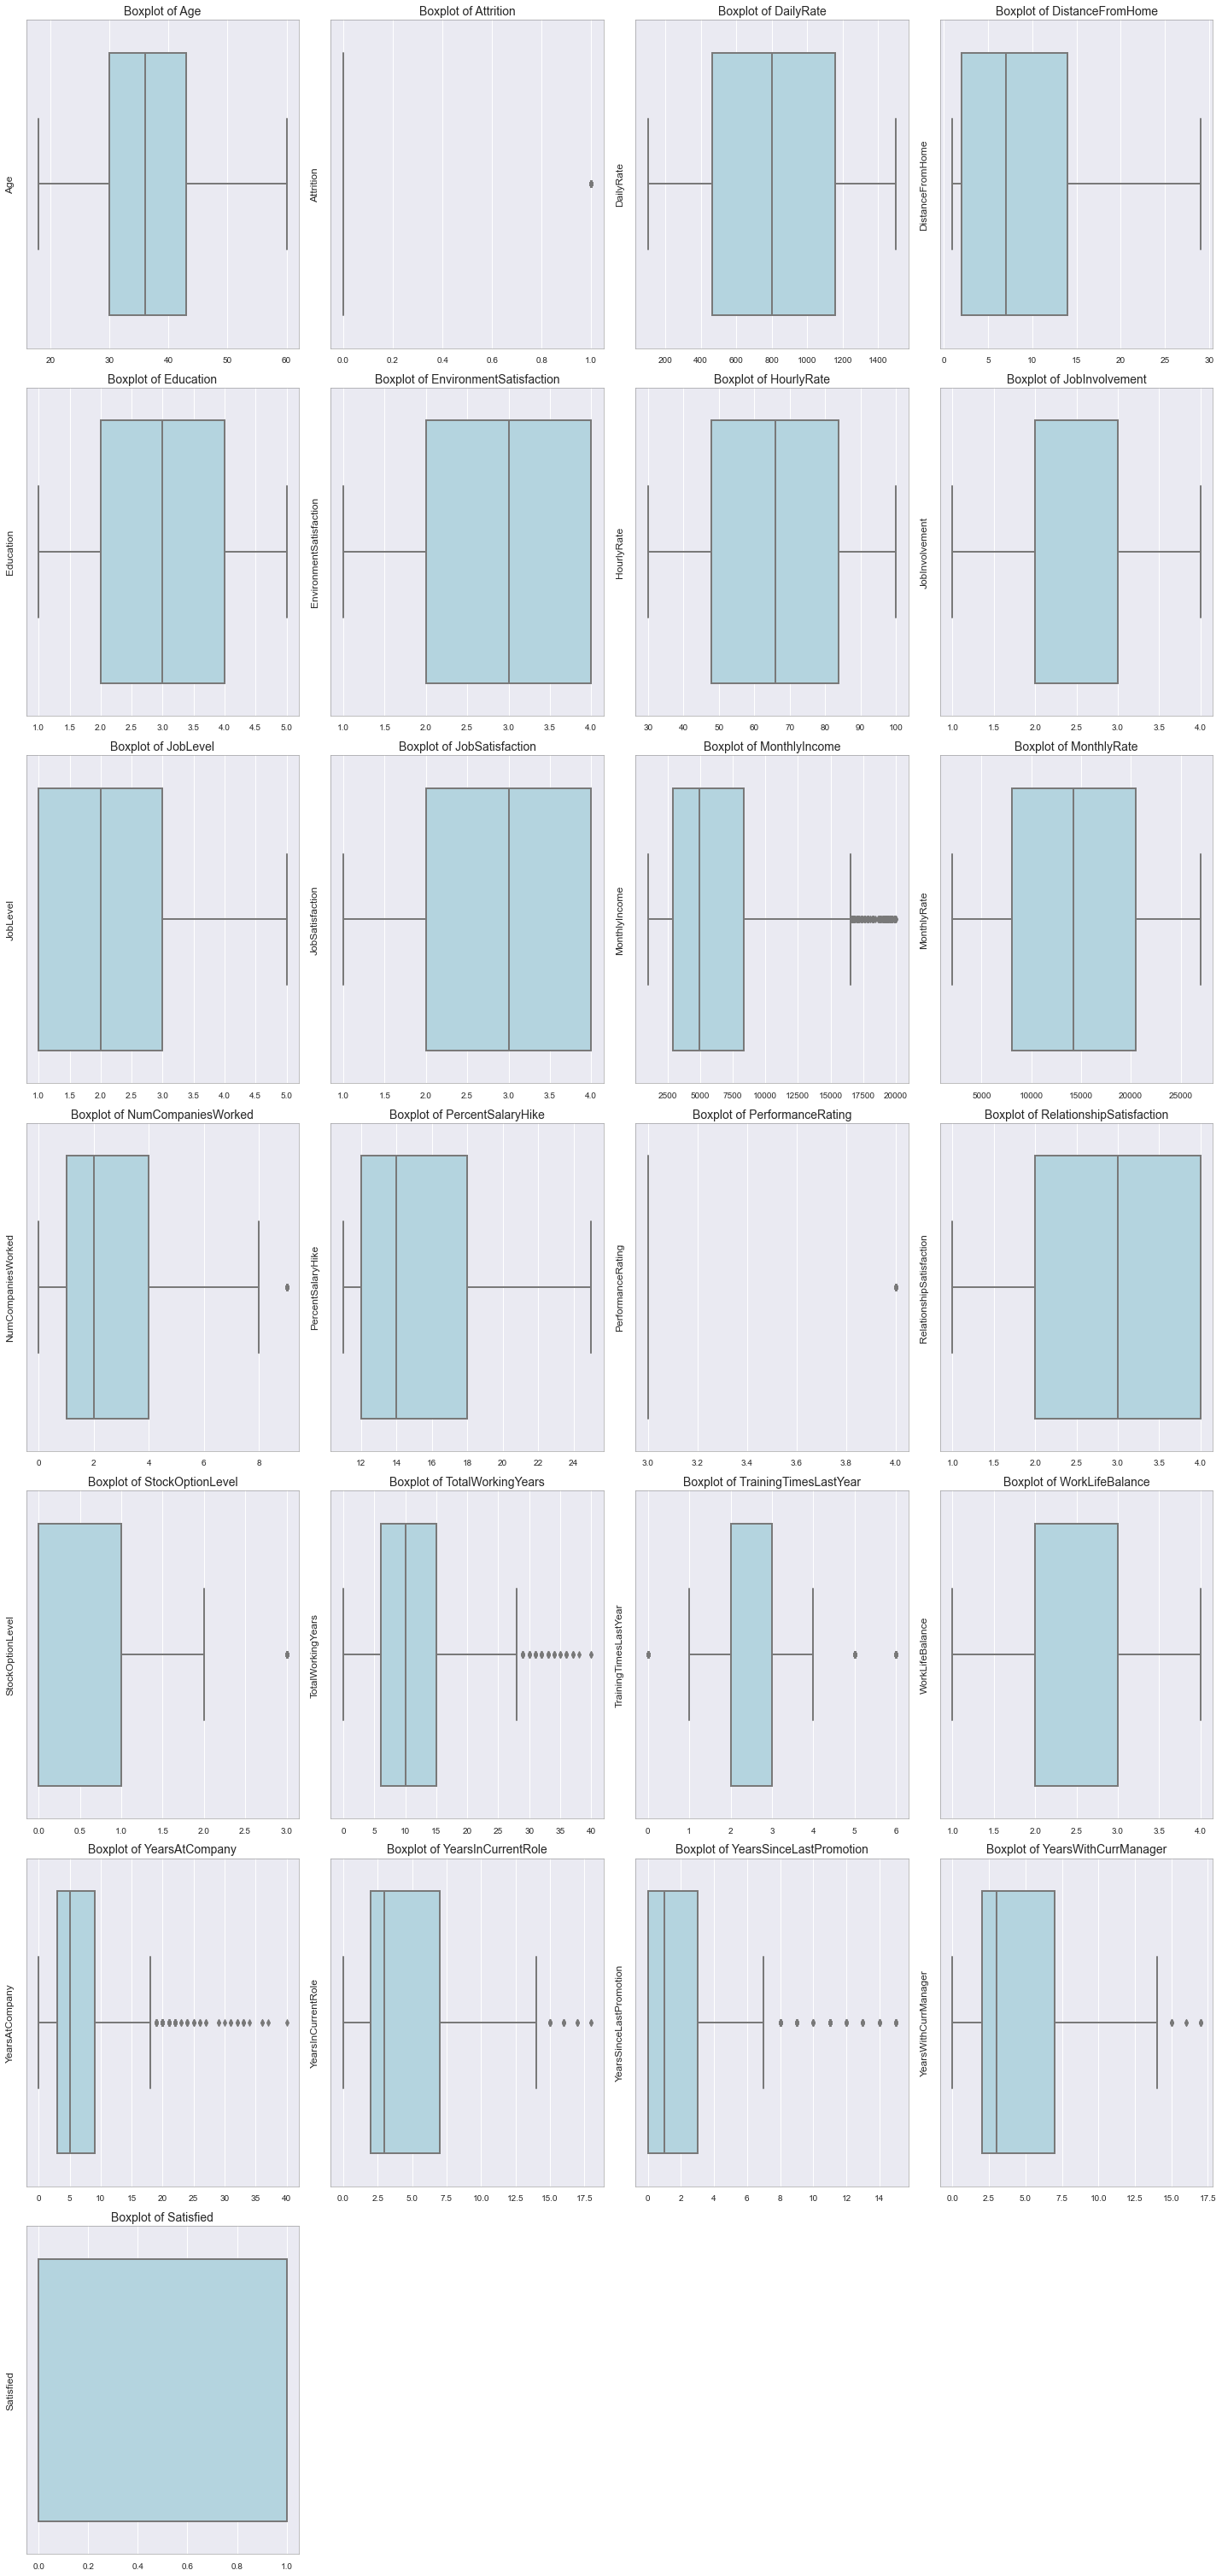

In [104]:
plot_numeric_variable_boxplots(df)

## Training

In [105]:
train_set = df_dum.sample(frac = 0.90, random_state = 123)
test_set = df_dum.drop(train_set.index, axis = 0)
train_set.reset_index(drop = True, inplace = True)
test_set.reset_index(drop = True, inplace = True)
print(f"Train shape => {train_set.shape}\nTest shape => {test_set.shape}")

Train shape => (1323, 46)
Test shape => (147, 46)


In [106]:
X = train_set.drop('Attrition', axis = 1)
Y = train_set.Attrition

print(X.shape)

(1323, 45)


In [107]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X)

In [108]:
classifiers = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier()]

In [109]:
for clf in classifiers:
    accuracy = (cross_val_score(clf, X_train_sc, Y, cv=5, scoring=make_scorer(accuracy_score))).mean()
    print(f"Accuracy of {clf.__class__.__name__} is {accuracy:.2f}")

Accuracy of LogisticRegression is 0.87
Accuracy of KNeighborsClassifier is 0.85
Accuracy of RandomForestClassifier is 0.86


In [110]:
for clf in classifiers:
    accuracy = (cross_val_score(clf, X_train_sc, Y, cv=5, scoring=make_scorer(f1_score))).mean()
    print(f"f1_score of {clf.__class__.__name__} is {accuracy:.2f}")

f1_score of LogisticRegression is 0.51
f1_score of KNeighborsClassifier is 0.25
f1_score of RandomForestClassifier is 0.23


In [111]:
for clf in classifiers:
    accuracy = (cross_val_score(clf, X_train_sc, Y, cv=5, scoring=make_scorer(roc_auc_score))).mean()
    print(f"AUC of {clf.__class__.__name__} is {accuracy:.2f}")

AUC of LogisticRegression is 0.69
AUC of KNeighborsClassifier is 0.57
AUC of RandomForestClassifier is 0.58


In [112]:
for clf in classifiers:
    accuracy = (cross_val_score(clf, X_train_sc, Y, cv=5, scoring=make_scorer(matthews_corrcoef))).mean()
    print(f"MCC of {clf.__class__.__name__} is {accuracy:.2f}")

MCC of LogisticRegression is 0.47
MCC of KNeighborsClassifier is 0.26
MCC of RandomForestClassifier is 0.29


In [113]:
X_val, y_val = test_set.drop("Attrition", axis = 1), test_set.Attrition
X_val_sc = sc.fit_transform(X_val)
X_val_sc

array([[ 0.13286962,  1.54643675, -0.83494378, ..., -0.99322026,
         1.60790729,  1.60790729],
       [-0.29173546,  1.59287625, -0.71827388, ...,  1.00682602,
        -0.6219264 ,  1.60790729],
       [ 0.23902088, -1.2814839 ,  1.61512413, ..., -0.99322026,
         1.60790729, -0.6219264 ],
       ...,
       [-1.03479434,  1.04293489, -0.48493407, ..., -0.99322026,
         1.60790729, -0.6219264 ],
       [-0.92864307, -1.43057912, -0.60160398, ...,  1.00682602,
        -0.6219264 ,  1.60790729],
       [-0.18558419, -0.27448018, -0.13492437, ...,  1.00682602,
        -0.6219264 , -0.6219264 ]])

In [114]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X)
X_val_sc = scaler.transform(X_val)

# Fit and evaluate logistic regression model
logistic_model = LogisticRegression().fit(X_train_sc, Y)
y_pred = logistic_model.predict(X_val_sc)
logistic_mcc = (cohen_kappa_score(y_pred, y_val) + 1)/2

# Fit and evaluate KNeighborsClassifier model
knn_model = KNeighborsClassifier().fit(X_train_sc, Y)
y_pred = knn_model.predict(X_val_sc)
knn_mcc = (cohen_kappa_score(y_pred, y_val) + 1)/2

# Fit and evaluate RandomForestClassifier model
rf_model = RandomForestClassifier().fit(X_train_sc, Y)
y_pred = rf_model.predict(X_val_sc)
rf_mcc = (cohen_kappa_score(y_pred, y_val) + 1)/2

    
print(f"Logistic Regression: {logistic_mcc}\nKnn: {knn_mcc}\nRandom Forest: {rf_mcc}")

Logistic Regression: 0.7905982905982907
Knn: 0.5916666666666666
Random Forest: 0.5797912005965697
